In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,18)
plt.rcParams.update({"font.size": 18})



In [4]:
#solve  y = Theta * s for "s"
n = 1000 #dimension of s
p = 200 #number of measurements,dim(y)
Theta = np.random.randn(p,n)
y = np.random.randn(p)

In [8]:
#L1 Minimize norm solution 
def L1_norm(x):
    return np.linalg.norm(x , ord =1)

constraint = ({"type" : "eq", "fun": lambda x : Theta @ x - y})
x0 = np.linalg.pinv(Theta) @ y  #initialize with L2 solution
res = minimize(L1_norm , x0 , method = 'SLSQP' , constraints=constraint)
s_L1 = res.x

In [9]:
#L2 Minimize norm solution s_L2
s_L2 = np.linalg.pinv(Theta) @ y

<ipython-input-10-0b8f6280e4ae>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[0].plot(s_L1, color = "y", LineWidth = 1.5)
<ipython-input-10-0b8f6280e4ae>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  axs[1].plot(s_L2, color ="c",LineWidth = 1.5)


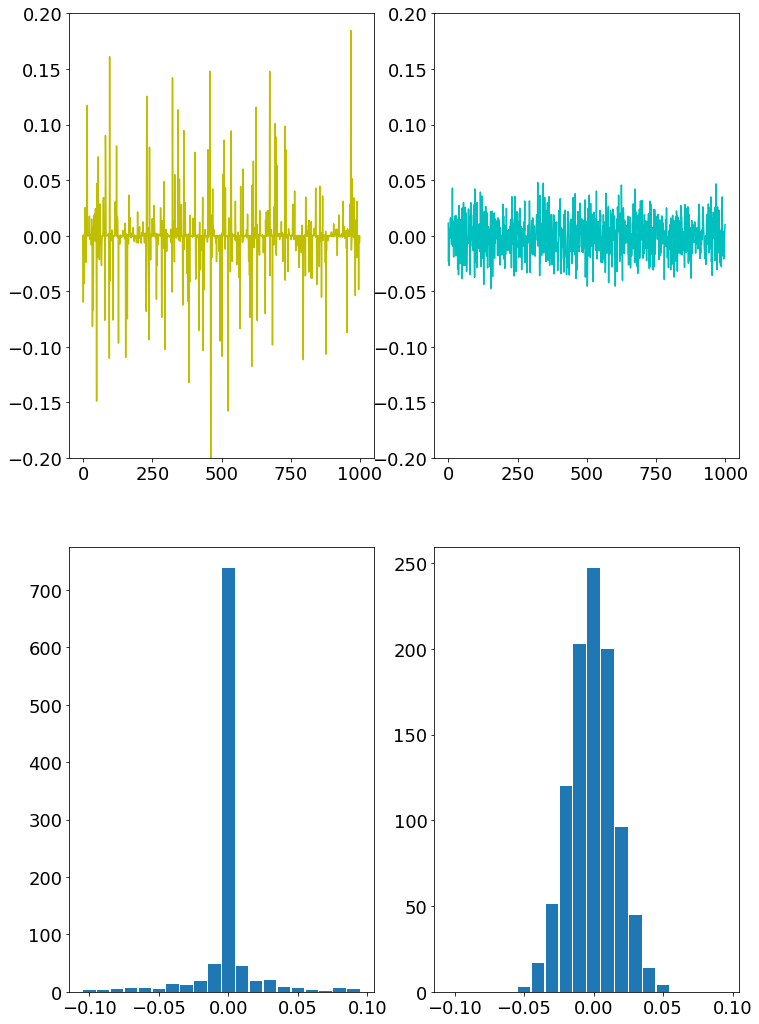

In [10]:
fig , axs = plt.subplots(2,2)
axs = axs.reshape(-1)
axs[0].plot(s_L1, color = "y", LineWidth = 1.5)
axs[0].set_ylim(-0.2,0.2)
axs[1].plot(s_L2, color ="c",LineWidth = 1.5)
axs[1].set_ylim(-0.2,0.2)
axs[2].hist(s_L1,bins = np.arange(-0.105,0.105,0.01), rwidth = 0.9)
axs[3].hist(s_L2,bins = np.arange(-0.105,0.105,0.01), rwidth = 0.9)
plt.show()